**Importing the Libraries**

In [1]:
# --------------------------------------------
# 📦 Data Manipulation and Numerical Operations
# --------------------------------------------
import pandas as pd              # For dataframes and tabular data operations
import numpy as np               # For numerical operations and arrays

# --------------------------------------------
# 📊 Data Visualization Libraries
# --------------------------------------------
import matplotlib.pyplot as plt  # For basic plots like line, bar, scatter, confusion matrix
import seaborn as sns            # For advanced statistical plots (e.g., heatmaps)

# --------------------------------------------
# 🧪 Model Selection and Data Preprocessing
# --------------------------------------------
from sklearn.model_selection import train_test_split  # To split data into training/testing sets
from sklearn.preprocessing import StandardScaler       # To scale/normalize feature data

# --------------------------------------------
# 🧠 Machine Learning Model
# --------------------------------------------

# LinearRegression is the machine learning model we’re using to find the line of best fit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression    # Logistic regression algorithm
from sklearn.naive_bayes import GaussianNB      #Naive Bayes algorithm
# --------------------------------------------
# 📈 Model Evaluation
# --------------------------------------------
from sklearn.metrics import (
    accuracy_score,            # Accuracy of the predictions
    classification_report,     # Precision, recall, f1-score summary
    confusion_matrix,        # Confusion matrix for performance
    roc_curve,
    roc_auc_score,
    mean_absolute_error, mean_squared_error, r2_score
)

# --------------------------------------------
# ⚖️ Handling Imbalanced Datasets
# --------------------------------------------
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE               # For oversampling the minority class
from google.colab import files

# Loading the dataset

In [2]:
# Upload the file manually
uploaded = files.upload()

# Load the uploaded CSV file into a DataFrame
df = pd.read_csv("survey_results_public.csv")


Saving survey_results_public.csv to survey_results_public (1).csv


# Data Inspection

In [3]:
# Show the first 5 rows of the DataFrame
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [4]:
# Show the last 5 rows of the DataFrame
print(df.tail())

       ResponseId                      MainBranch              Age  \
65432       65433  I am a developer by profession  18-24 years old   
65433       65434  I am a developer by profession  25-34 years old   
65434       65435  I am a developer by profession  25-34 years old   
65435       65436  I am a developer by profession  18-24 years old   
65436       65437     I code primarily as a hobby  18-24 years old   

                Employment                            RemoteWork   Check  \
65432  Employed, full-time                                Remote  Apples   
65433  Employed, full-time                                Remote  Apples   
65434  Employed, full-time                             In-person  Apples   
65435  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
65436   Student, full-time                                   NaN  Apples   

                                        CodingActivities  \
65432                      Hobby;School or academic work   
65

In [5]:
# Print number of rows and columns (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (65437, 114)


In [6]:
# Print the list of column names
print("Column names:", df.columns.tolist())

Column names: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWa

# Data Cleaning

In [7]:
#drop the unwanted column ResponseId
df.drop(columns=['ResponseId'], inplace=True)

In [8]:
#check duplicate rows present
num_duplicates = df.duplicated().sum()
print(int(num_duplicates))

487


In [9]:
# Show the data type of each column
print(df.dtypes)

MainBranch              object
Age                     object
Employment              object
RemoteWork              object
Check                   object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 113, dtype: object


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 113 entries, MainBranch to JobSat
dtypes: float64(13), object(100)
memory usage: 56.4+ MB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CompTotal,33740.0,2.963841e+145,5.444117e+147,0.0,60000.0,110000.0,250000.0,1.000000e+150
WorkExp,29658.0,1.146696e+01,9.168709e+00,0.0,4.0,9.0,16.0,5.000000e+01
JobSatPoints_1,29324.0,1.858109e+01,2.596622e+01,0.0,0.0,10.0,22.0,1.000000e+02
JobSatPoints_4,29393.0,7.522140e+00,1.842266e+01,0.0,0.0,0.0,5.0,1.000000e+02
JobSatPoints_5,29411.0,1.006086e+01,2.183384e+01,0.0,0.0,0.0,10.0,1.000000e+02
JobSatPoints_6,29450.0,2.434323e+01,2.708936e+01,0.0,0.0,20.0,30.0,1.000000e+02
JobSatPoints_7,29448.0,2.296522e+01,2.701774e+01,0.0,0.0,15.0,30.0,1.000000e+02
JobSatPoints_8,29456.0,2.027817e+01,2.610811e+01,0.0,0.0,10.0,25.0,1.000000e+02
JobSatPoints_9,29456.0,1.616943e+01,2.484503e+01,0.0,0.0,5.0,20.0,1.000000e+02
JobSatPoints_10,29450.0,1.095571e+01,2.290626e+01,0.0,0.0,0.0,10.0,1.000000e+02


In [12]:
# Count missing (NaN) values in each column
#Identifying missing values is crucial as they can affect the accuracy of our analysis and models.
print(df.isnull().sum())

MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
Check                      0
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 113, dtype: int64


# Outlier Analysis

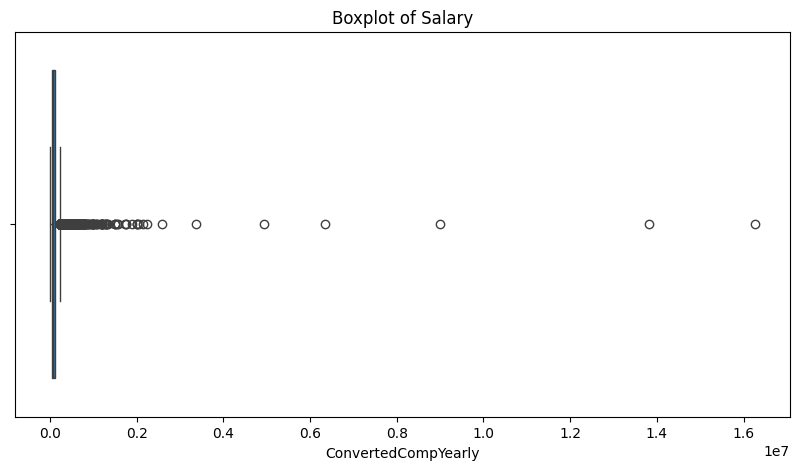

In [13]:
#spotting outliers visually
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title("Boxplot of Salary")
plt.show()

In [14]:
#Outlier analysis using IQR method

for col in df.select_dtypes(include=np.number).columns:  # Only include numeric columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Calculate outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percent_outliers = (len(outliers) / len(df)) * 100

    print(f"{col}: {percent_outliers:.2f}% outliers")


CompTotal: 8.98% outliers
WorkExp: 1.33% outliers
JobSatPoints_1: 4.95% outliers
JobSatPoints_4: 6.38% outliers
JobSatPoints_5: 4.92% outliers
JobSatPoints_6: 4.06% outliers
JobSatPoints_7: 4.01% outliers
JobSatPoints_8: 4.37% outliers
JobSatPoints_9: 4.36% outliers
JobSatPoints_10: 5.31% outliers
JobSatPoints_11: 4.95% outliers
ConvertedCompYearly: 1.49% outliers
JobSat: 2.08% outliers


In [15]:
# For ConvertedCompYearly
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_filtered = df[(df['ConvertedCompYearly'] >= lower) & (df['ConvertedCompYearly'] <= upper)]

## EDA
# Univariate Analysis
# Target variable(ConvertedCompYearly)

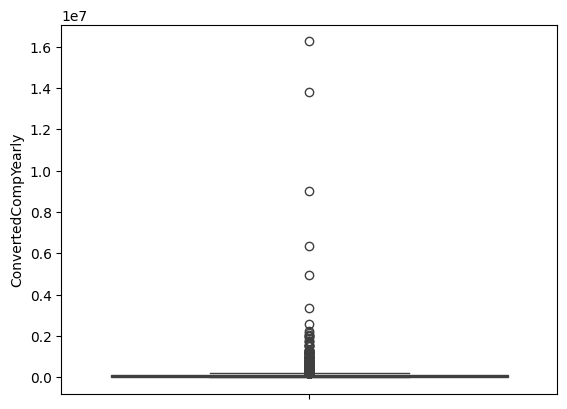

<Axes: xlabel='ConvertedCompYearly', ylabel='Count'>

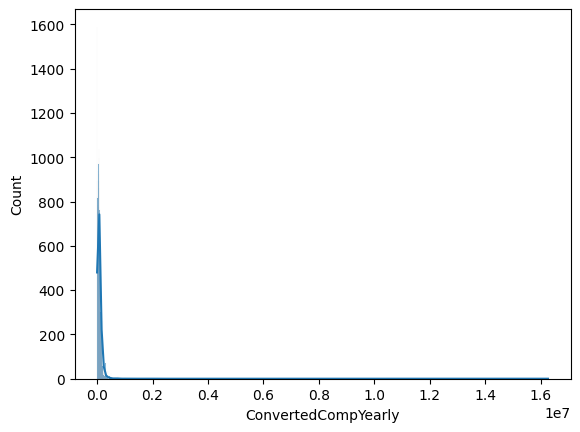

In [16]:
sns.boxplot(df['ConvertedCompYearly'])
plt.show()
sns.histplot(df['ConvertedCompYearly'], kde=True)

Text(0.5, 1.0, 'Top Education Levels')

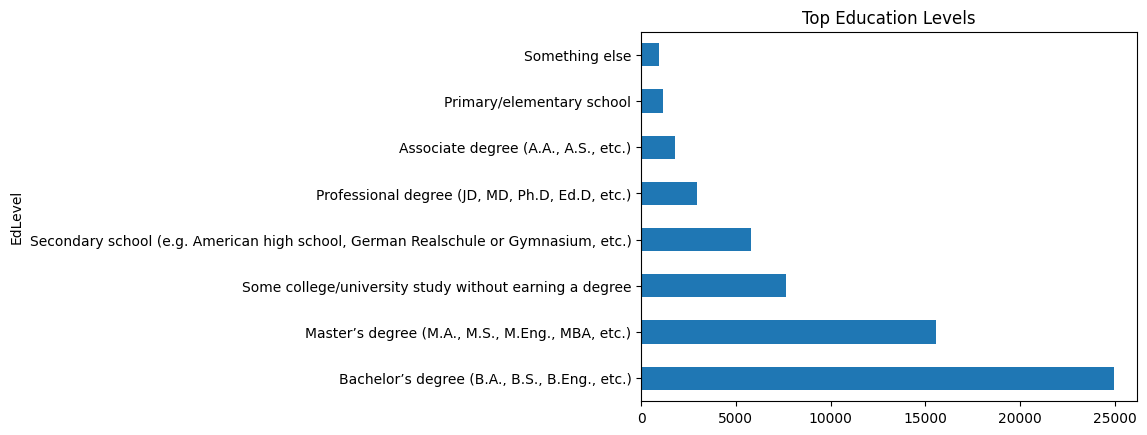

In [17]:
df['EdLevel'].value_counts().head(10).plot(kind='barh')    #for cstegorical variables
plt.title("Top Education Levels")

# Bivariate Analysis
# 1. Numerical vs Numerical
# Scatter Plot

<Axes: xlabel='WorkExp', ylabel='ConvertedCompYearly'>

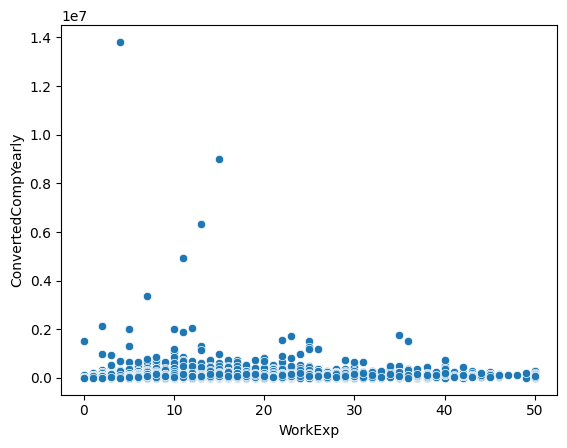

In [18]:
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df)

** Correlation Coefficient**

In [19]:
df[['WorkExp', 'ConvertedCompYearly']].corr()

,WorkExp,ConvertedCompYearly
WorkExp,1.000000,0.154114
ConvertedCompYearly,0.154114,1.000000


# 2. Categorical vs Numerical
**Box Plot**

<Axes: xlabel='RemoteWork', ylabel='ConvertedCompYearly'>

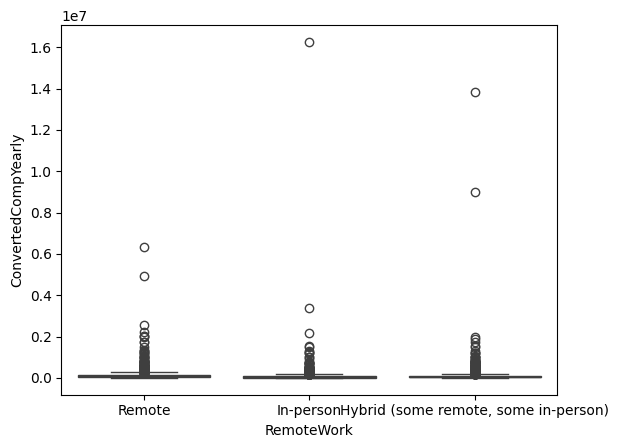

In [20]:
sns.boxplot(x='RemoteWork', y='ConvertedCompYearly', data=df)

**Bar Plot (using mean or median salary)**

<Axes: xlabel='RemoteWork'>

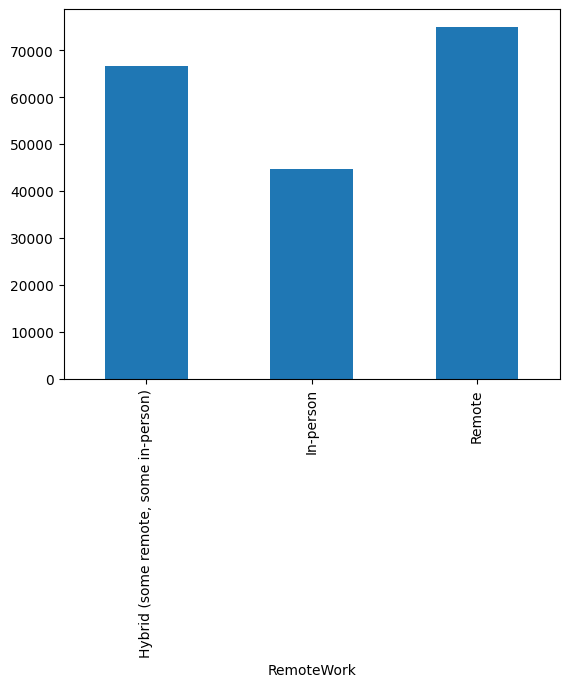

In [21]:
df.groupby('RemoteWork')['ConvertedCompYearly'].median().plot(kind='bar')

**Violin Plot (optional, for distribution + density)**

<Axes: xlabel='EdLevel', ylabel='ConvertedCompYearly'>

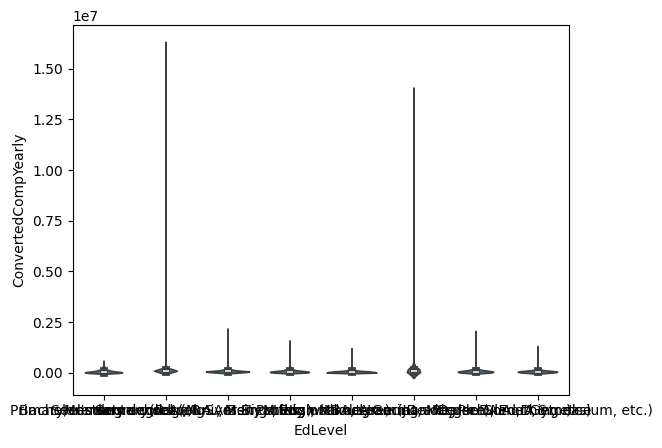

In [22]:
sns.violinplot(x='EdLevel', y='ConvertedCompYearly', data=df)

**3. Categorical vs Categorical (less common for regression)**

<Axes: xlabel='RemoteWork'>

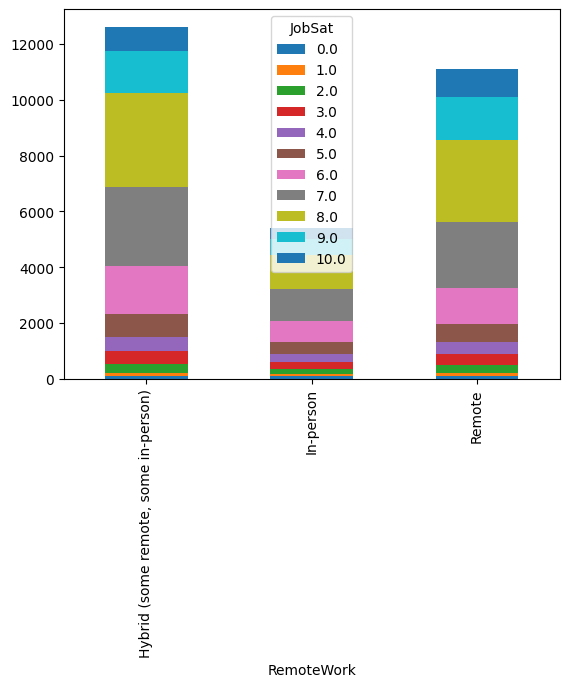

In [23]:
pd.crosstab(df['RemoteWork'], df['JobSat']).plot(kind='bar', stacked=True)

**Multivariate Analysis**

**1. Pairplot for All Numeric Features**

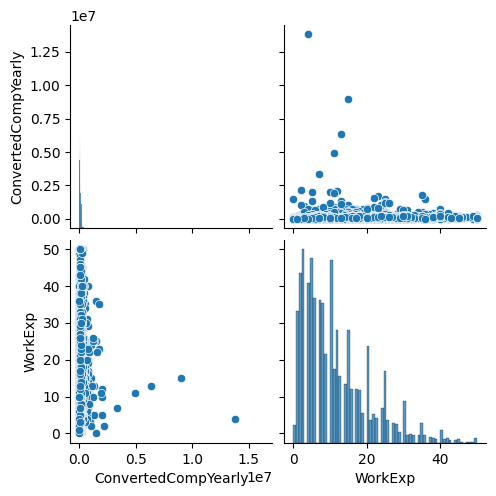

In [24]:
sns.pairplot(df[['ConvertedCompYearly', 'WorkExp', 'Age']])

**2. Heatmap of Correlation**

<Axes: >

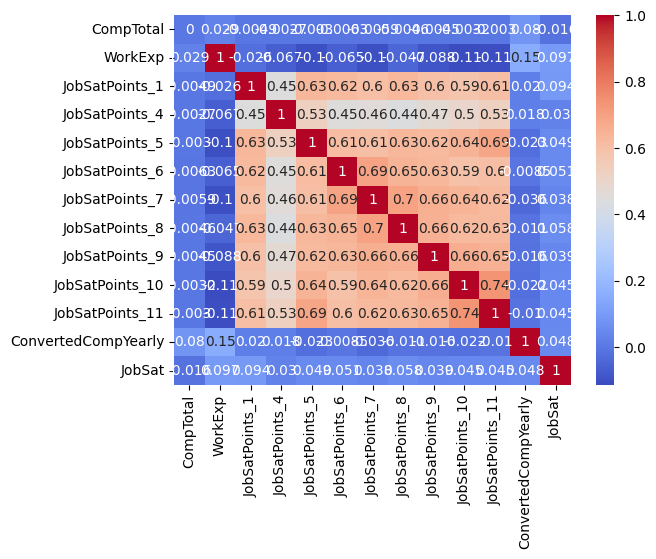

In [25]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

**Data Preprocessing for Modeling**

This is the bridge between EDA and modeling. Include:

🔹 Handling Missing Values (if not done yet)

df.fillna() or df.dropna() or imputation depending on variable importance

🔹 Encoding Categorical Features

Use pd.get_dummies() or LabelEncoder/OneHotEncoder for ML-ready format

🔹 Feature Scaling

Use StandardScaler() on numerical features (important for regression and distance-based models)

**Drop Missing Target & Select Features**

In [26]:
df = df[['Country', 'EdLevel', 'YearsCode', 'Employment', 'ConvertedCompYearly']]  # example features
df = df.dropna(subset=['ConvertedCompYearly'])  # drop missing target

# Drop rows with missing features (optional: or impute)
df = df.dropna()

In [27]:
X = df.drop('ConvertedCompYearly', axis=1)
y = df['ConvertedCompYearly']

**Train test split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Preprocess: Encode Categorical Columns**

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()

# OneHotEncoder for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # keep numeric columns
)

8. Modeling
Since target is numerical (salary), start with regression models:

✅ Linear Regression

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Country', 'EdLevel',
                                                   'YearsCode',
                                                   'Employment'])])),
                ('regressor', LinearRegression())])

9. Model Evaluation
Since it’s regression:

mean_absolute_error

mean_squared_error

r2_score

In [31]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r_squared)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 40787.53710991179
Mean Squared Error (MSE): 13482517875.990465
R-squared (R²): 0.11629096984477871
Root Mean Squared Error (RMSE): 116114.24493140566


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


The linear regression model resulted in a mean absolute error of approximately 40,787.54 and a root mean squared error of about 116,114.24, with an R-squared of 0.116. These metrics indicate that the model explains only around 11.6% of the variation in software developers' salaries, suggesting a weak predictive capability. so now do random forest algorithm

In [32]:
# --------------------------------------------
# 🧠 Random Forest Regressor
# --------------------------------------------
from sklearn.ensemble import RandomForestRegressor

# Define the pipeline (replace LinearRegression with RandomForestRegressor)
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the evaluation metrics
print("Random Forest Evaluation Metrics:")
print("Mean Absolute Error (MAE):", round(mae_rf, 2))
print("Mean Squared Error (MSE):", round(mse_rf, 2))
print("Root Mean Squared Error (RMSE):", round(rmse_rf, 2))
print("R-squared (R²):", round(r2_rf, 4))

Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 40620.82
Mean Squared Error (MSE): 13900845989.01
Root Mean Squared Error (RMSE): 117901.85
R-squared (R²): 0.0889


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [33]:
# Convert YearsCode like 'Less than 1 year' and 'More than 50 years' to numeric
df['YearsCode'] = df['YearsCode'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51})
df['YearsCode'] = df['YearsCode'].astype(float)

In [34]:
df['IsSenior'] = df['YearsCode'].apply(lambda x: 1 if x >= 5 else 0)

In [35]:
df['HasDegree'] = df['EdLevel'].apply(lambda x: 1 if 'Bachelor’' in x or 'Master’' in x or 'Professional' in x else 0)


In [36]:
df['IsFullTime'] = df['Employment'].apply(lambda x: 1 if 'full-time' in x.lower() else 0)


In [37]:
# Group countries by frequency or region
top_countries = df['Country'].value_counts().head(10).index
df['CountryGroup'] = df['Country'].apply(lambda x: x if x in top_countries else 'Other')


In [38]:
df = df.dropna(subset=['ConvertedCompYearly'])

# Final feature set (including engineered)
features = ['CountryGroup', 'HasDegree', 'IsFullTime', 'IsSenior', 'YearsCode']
X = df[features]
y = df['ConvertedCompYearly']

In [39]:
# Redefine column types
categorical_cols = ['CountryGroup']
numeric_cols = ['HasDegree', 'IsFullTime', 'IsSenior', 'YearsCode']

# Preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# Model pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
rf_model.fit(X_train, y_train)

# Predictions & Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred_rf = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("After Feature Engineering:")
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))


After Feature Engineering:
MAE: 43098.55
RMSE: 119402.1
R² Score: 0.0655
